In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
final_opt = pd.read_csv("opt"+str(0+1)+".txt",sep='\t',names=['i', 'avg_time','avg_hash'])
final_naive = pd.read_csv("naive"+str(0+1)+".txt",sep='\t',names=['i', 'avg_time','avg_hash'])
final_opt['n'] = 2**final_opt['i']
final_naive['n'] = 2**final_naive['i']

In [3]:
final_naive['avg_hash'].mean()

3396.89348

In [4]:
max(final_naive['avg_hash'])

3585.8615

In [5]:
min(final_naive['avg_hash'])

1834.8624

In [6]:
final_opt['avg_hash'].mean()

6915.0869250000005

In [7]:
max(final_opt['avg_hash'])

8196.6233

In [8]:
min(final_opt['avg_hash'])

3676.4706

In [9]:
x = final_opt['avg_hash']/final_naive['avg_hash']

In [10]:
x.describe()

count    20.000000
mean      2.063823
std       0.336673
min       1.033337
25%       2.015451
50%       2.026059
75%       2.057153
max       3.022181
Name: avg_hash, dtype: float64

In [11]:
result = pd.merge(final_naive,final_opt,on=["n","i"])

In [24]:
print(result[['n','avg_hash_x','avg_hash_y']].to_latex(index=False))

\begin{tabular}{rrr}
\toprule
       n &  avg\_hash\_x &  avg\_hash\_y \\
\midrule
       2 &   3557.8614 &   3676.4706 \\
       4 &   1834.8624 &   5545.2865 \\
       8 &   2754.8209 &   6465.4857 \\
      16 &   3216.9118 &   6944.4444 \\
      32 &   3448.2759 &   7179.2497 \\
      64 &   3285.2904 &   6722.8684 \\
     128 &   3585.8615 &   7346.9860 \\
     256 &   3556.1280 &   7223.7960 \\
     512 &   3568.4299 &   7234.3739 \\
    1024 &   3553.5466 &   8196.6233 \\
    2048 &   3563.7149 &   7217.7598 \\
    4096 &   3542.0495 &   7178.9208 \\
    8192 &   3559.8976 &   7154.5116 \\
   16384 &   3557.0436 &   7177.0398 \\
   32768 &   3555.6086 &   7173.5082 \\
   65536 &   3557.6478 &   7167.1899 \\
  131072 &   3558.4293 &   7172.5261 \\
  262144 &   3559.6915 &   7173.3474 \\
  524288 &   3561.3188 &   7175.0318 \\
 1048576 &   3560.4792 &   7176.3186 \\
\bottomrule
\end{tabular}



In [12]:
final_opt

,i,avg_time,avg_hash,n
0,1,0.0003,3676.4706,2
1,2,0.0005,5545.2865,4
2,3,0.0011,6465.4857,8
3,4,0.0022,6944.4444,16
4,5,0.0043,7179.2497,32
5,6,0.0094,6722.8684,64
6,7,0.0173,7346.9860,128
7,8,0.0353,7223.7960,256
8,9,0.0706,7234.3739,512
9,10,0.1421,8196.6233,1024


In [15]:
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color=['tab:red', 'tab:green', 'b', 'y'])

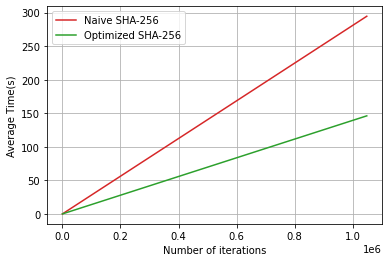

In [11]:
ax = final_naive.plot(x="n",y="avg_time")
final_opt.plot(x="n",y="avg_time",ax=ax)
ax.set(xlabel = "Number of iterations",ylabel = "Average Time(s)")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("emu_t_vs_n.png",bbox_inches="tight",dpi=1000)

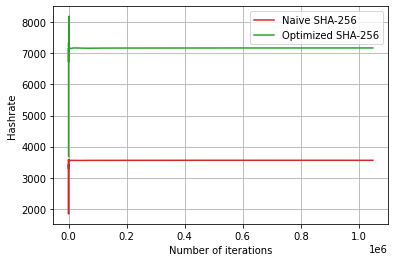

In [12]:
ax = final_naive.plot(x="n",y="avg_hash")
final_opt.plot(x="n",y="avg_hash",ax=ax)
ax.set(xlabel = "Number of iterations",ylabel = "Hashrate")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("emu_h_vs_n.png",bbox_inches="tight",dpi=1000)

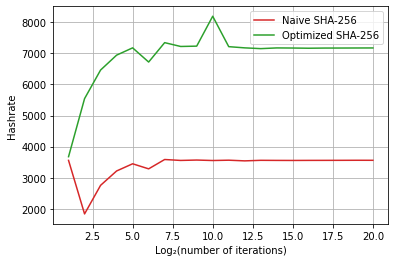

In [16]:
ax = final_naive.plot(x="i",y="avg_hash")
final_opt.plot(x="i",y="avg_hash",ax=ax)
ax.set(xlabel = "Log\N{SUBSCRIPT TWO}(number of iterations)",ylabel = "Hashrate")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("emu_h_vs_i.pdf",bbox_inches="tight",dpi=1000)

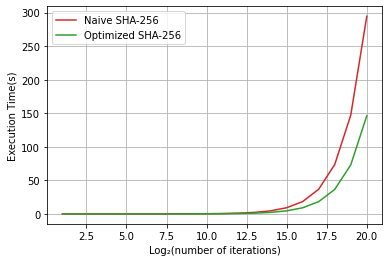

In [14]:
ax = final_naive.plot(x="i",y="avg_time")
final_opt.plot(x="i",y="avg_time",ax=ax)
ax.set(xlabel = "Log\N{SUBSCRIPT TWO}(number of iterations)",ylabel = "Execution Time(s)")
ax.legend(['Naive SHA-256','Optimized SHA-256'])
plt.grid()
plt.savefig("emu_t_vs_i.png",bbox_inches="tight",dpi=1000)